# Lab Session \# 04


---


by Josué Obregón <br>
BDA712-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>

## Objective

The objective of this session is to improve our previous linear regression implementation by tweaking our training function with the gradient descent algorithm. 

Additionally we will implement multiple linear regression using more than one predictor.


# Getting the data

In [25]:
import gdown

In [26]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [27]:
urls = ['https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G', # pizza.txt  https://drive.google.com/file/d/1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G/view?usp=sharing       
        'https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP', # pizza_2_vars.txt  https://drive.google.com/file/d/1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP/view?usp=sharing      
        'https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe', # pizza_3_vars.txt  https://drive.google.com/file/d/12mp_1uPGEIyW334Znp33RIPHoirFNrYe/view?usp=sharing       
      ]
outputs = ['pizza.txt','pizza_2_vars.txt','pizza_3_vars.txt']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G
To: /content/data/pizza.txt
100%|██████████| 232/232 [00:00<00:00, 251kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP
To: /content/data/pizza_2_vars.txt
100%|██████████| 360/360 [00:00<00:00, 354kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe
To: /content/data/pizza_3_vars.txt
100%|██████████| 468/468 [00:00<00:00, 807kB/s]


# Preliminaries

Let's import the data and prepare the variables that we will need for our laboratory

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = np.genfromtxt('data/pizza.txt', delimiter=',', skip_header=1)
X, Y = data[:,0], data[:,1]
print(X.shape)
print(Y.shape)

(30,)
(30,)


Let's define our previous functions

In [30]:
def predict(X, w, b):
  return X * w + b

def loss(X, Y, w, b):
  return np.average((predict(X, w, b) - Y) ** 2)

def train_old(X, Y, iterations, lr):
  w = 0
  b = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w, b)
    print(f'Iteration {i} => Loss (MSE): {current_loss:.6f}')
    if loss(X, Y, w + lr, b) < current_loss:
      w += lr
    elif loss(X, Y, w - lr, b) < current_loss:
      w -= lr
    elif loss(X, Y, w, b + lr) < current_loss:
      b += lr
    elif loss(X, Y, w, b - lr) < current_loss:
      b -= lr
    else:
      print(f'Best w: {w}, Best b: {b}')
      return w, b
  print(f'Best w: {w}, Best b: {b}')
  raise Exception(f'Couldn\'t converge within {iterations} iterations')

Alright, let's get right into business!

# Gradient descent

---
Remember that the mean squared error loss function is defined by:

$L=\frac{1}{m} \sum_{i=1}^{m} (wx_i + b - y_i)^2$

and getting the partial derivatives of L with respect to $w$ and $b$ gives us:

* $\frac{\partial{L}}{\partial{w}}=\frac{2}{m} \sum_{i=1}^{m} x_i(wx_i + b - y_i)$

* $\frac{\partial{L}}{\partial{b}}=\frac{2}{m} \sum_{i=1}^{m} (wx_i + b - y_i)$

So now let's code the gradient function:

In [68]:
def gradient(X, Y, w, b): 
  w_gradient = 2 * np.mean(X*predict(X, w, b) - Y)
  b_gradient = 2 * np.mean(predict(X, w, b) - Y)
  return w_gradient, b_gradient

And our train function 

In [72]:
def train(X, Y, iterations, lr):
  w = 0
  b = 0
  for i in range(iterations): 
    print(f'(iteration {i} => loss(MSE){loss(X, Y, w, b):.6f}') 
    w_gradient, b_gradient = gradient(X, Y, w, b)  
    w -= w_gradient *lr
    b -= b_gradient *lr
  return w,b

Let's try our new function. Play around a bit and let's share our results

In [76]:
w, b = train(X, Y, iterations = 1000, lr = 0.0001)

(iteration 0 => loss(MSE)812.866667
(iteration 1 => loss(MSE)808.249812
(iteration 2 => loss(MSE)803.847365
(iteration 3 => loss(MSE)799.648776
(iteration 4 => loss(MSE)795.644057
(iteration 5 => loss(MSE)791.823747
(iteration 6 => loss(MSE)788.178884
(iteration 7 => loss(MSE)784.700970
(iteration 8 => loss(MSE)781.381952
(iteration 9 => loss(MSE)778.214192
(iteration 10 => loss(MSE)775.190442
(iteration 11 => loss(MSE)772.303826
(iteration 12 => loss(MSE)769.547819
(iteration 13 => loss(MSE)766.916224
(iteration 14 => loss(MSE)764.403155
(iteration 15 => loss(MSE)762.003022
(iteration 16 => loss(MSE)759.710515
(iteration 17 => loss(MSE)757.520585
(iteration 18 => loss(MSE)755.428434
(iteration 19 => loss(MSE)753.429499
(iteration 20 => loss(MSE)751.519442
(iteration 21 => loss(MSE)749.694135
(iteration 22 => loss(MSE)747.949651
(iteration 23 => loss(MSE)746.282254
(iteration 24 => loss(MSE)744.688389
(iteration 25 => loss(MSE)743.164668
(iteration 26 => loss(MSE)741.707870
(iteration 

In [77]:
x_new = 20 
print(f'w = {w}, b = {b}')
print(f'predict(x_new, w, b), ==> y = {predict(x_new, w, b):.2f}')

w = -0.15574455210004873, b = 4.92078520483759
predict(x_new, w, b), ==> y = 1.81


In [66]:
%%time
train_old(X,Y,iterations = 5000, lr = 0.0001) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 1 => Loss (MSE): 812.785989
Iteration 2 => Loss (MSE): 812.705315
Iteration 3 => Loss (MSE): 812.624646
Iteration 4 => Loss (MSE): 812.543982
Iteration 5 => Loss (MSE): 812.463321
Iteration 6 => Loss (MSE): 812.382665
Iteration 7 => Loss (MSE): 812.302014
Iteration 8 => Loss (MSE): 812.221367
Iteration 9 => Loss (MSE): 812.140724
Iteration 10 => Loss (MSE): 812.060085
Iteration 11 => Loss (MSE): 811.979451
Iteration 12 => Loss (MSE): 811.898822
Iteration 13 => Loss (MSE): 811.818196
Iteration 14 => Loss (MSE): 811.737576
Iteration 15 => Loss (MSE): 811.656959
Iteration 16 => Loss (MSE): 811.576347
Iteration 17 => Loss (MSE): 811.495739
Iteration 18 => Loss (MSE): 811.415136
Iteration 19 => Loss (MSE): 811.334537
Iteration 20 => Loss (MSE): 811.253942
Iteration 21 => Loss (MSE): 811.173352
Iteration 22 => Loss (MSE): 811.092766
Iteration 23 => Loss (MSE): 811.012184
Iteration 24 => Loss (MSE): 810.931607
Iteration 25 => Loss (MSE): 810.85103

Exception: ignored

In [57]:
%%time
train_old(X,Y,iterations = 100, lr = 0.0009) 

Iteration 0 => Loss (MSE): 812.866667
Iteration 1 => Loss (MSE): 812.140724
Iteration 2 => Loss (MSE): 811.415136
Iteration 3 => Loss (MSE): 810.689902
Iteration 4 => Loss (MSE): 809.965022
Iteration 5 => Loss (MSE): 809.240497
Iteration 6 => Loss (MSE): 808.516327
Iteration 7 => Loss (MSE): 807.792511
Iteration 8 => Loss (MSE): 807.069049
Iteration 9 => Loss (MSE): 806.345942
Iteration 10 => Loss (MSE): 805.623189
Iteration 11 => Loss (MSE): 804.900791
Iteration 12 => Loss (MSE): 804.178747
Iteration 13 => Loss (MSE): 803.457058
Iteration 14 => Loss (MSE): 802.735723
Iteration 15 => Loss (MSE): 802.014743
Iteration 16 => Loss (MSE): 801.294117
Iteration 17 => Loss (MSE): 800.573846
Iteration 18 => Loss (MSE): 799.853929
Iteration 19 => Loss (MSE): 799.134366
Iteration 20 => Loss (MSE): 798.415158
Iteration 21 => Loss (MSE): 797.696304
Iteration 22 => Loss (MSE): 796.977805
Iteration 23 => Loss (MSE): 796.259660
Iteration 24 => Loss (MSE): 795.541870
Iteration 25 => Loss (MSE): 794.824

Exception: ignored

Let's check the best result

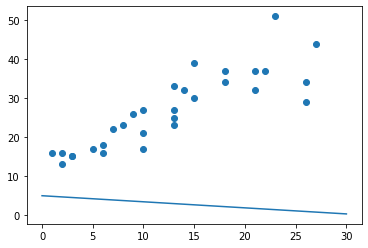

In [82]:
x_line = np.linspace(0, 30, 100) 
y_line = w*x_line+b 

plt.figure()
plt.scatter(X,Y) 
plt.plot(x_line, y_line) 
plt.show()

Let's plot the line

## Visualizing training history

Let's improve our train functino with two more functionalities:

* First, we will add a stop criterion. With GD, the loss could in theory decrease forever, inching toward the minimum in smaller and smaller steps, without ever quite reaching it. So, when should we stop making
those ever-tinier steps?
  * We could decide to stop when the gradient becomes small enough. We will use a paramter name precision for this
* We will also return the training history, including values of w, b and loss at each step

Let's do it!

In [83]:
def train_with_history(X, Y, iterations, lr = 0.001, precision = 1e-6,
                       initial_w = 0, initial_b = 0):
  w = initial_w
  b = initial_b

  previous_loss = loss(X, Y, w)
  history = [[w, b, previous_loss]]

  for i in range(iterations): 
    print(f'(iteration {i} => loss(MSE){loss(X, Y, w, b):.6f}') 
    w_gradient, b_gradient = gradient(X, Y, w, b)  
    w -= w_gradient *lr
    b -= b_gradient *lr
    
    current_loss = loss(X, Y, w, b)
    history.append([w, b, current_loss])
    
    if (abs(current_loss - previous_loss)) < precision: 
      return w,b, history 

    previous_loss = current_loss

  print(f'Couldn\'t converge within {iterations} iterations. Last w: {w}, b :{b}')
  return w,b, history 

In [85]:
w, b, history = train_with_history(X, Y, iterations = 10000, lr = 0.001, precision = 1e-3, initial_w = 10,initial_b = -100)
print(w, b)

TypeError: ignored

In [ ]:
history = np.array(history)
history_w = history[:,0]
history_b = history[:,1]
history_loss = history[:,2]

Now let's plot our first learning curve!
  It is just a simple curve to visualize how the loss behaves at each iteration

In [81]:
sart_iteration = 100
x_iterations = range(sart_iteration, history.shape[0]) 

plt.figure()
plt.plot(x_iterations, history_loss[sart_iteration:], 'tab:blue')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

NameError: ignored

Finally, we will check the following code. 
It is a quick visualization program to plot the algorithm’s path, from an arbitrary starting point to the minimum loss. We just learned an intuitive understanding of gradient descent , but nothing beats watching it in motion as  shown in the graph on page 42 of the book.

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Prepare matrices for 3D plot (W, B and L for weights, biases and losses)
MESH_SIZE = 20
weights = np.linspace(np.min(history_w) - 10, np.max(history_w) + 10,
                      MESH_SIZE)
biases = np.linspace(np.min(history_b) - 100, np.max(history_b) + 100,
                     MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
print(L.shape)

In [ ]:
# Plot surface
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Weight", labelpad=20, fontsize=20)
ax.set_ylabel("Bias", labelpad=20, fontsize=20)
ax.set_zlabel("Loss", labelpad=5, fontsize=20)
ax.plot_surface(W, B, L, cmap=cm.gnuplot,
                linewidth=0, antialiased=True, color='black')

# Mark endpoint
plt.plot([history_w[-1]], [history_b[-1]], [history_loss[-1]],
         "gX", markersize=16)

plt.plot([history_w[0]], [history_b[0]], [history_loss[0]], "wo")
plt.plot(history_w, history_b, history_loss, color="w", linestyle="dashed")

plt.tight_layout()
plt.show()


Before we move on to the next topic, let's do an exercise.

* Try to make the algorithm to fail

## Summary

In the first part of our notebook we learned:

*  We investigated gradient descent, the most widely used algorithm to miminize loss.

* No matter how complicated our model and dataset are, gradient descent always works the same way: 
  * It takes a step in the opposite direction as the gradient of the loss, and keeps doing that until the gradient becomes small. 
  * To find the gradient, we took the partial derivatives of the loss with respect to $w$ and $b$.

* GD has a few limitations:
  * In particular, being based on derivatives, it expects that the loss function is smooth and without gaps, so that you can calculate its derivative anywhere. 
  * Also, GD can get stuck in a local minimum, failing to reach the global minimum. To avoid those problems, we’ll try to use smooth
loss functions that have only one minimum.

* GD is not the be all and end all of the algorithms that minimize loss. 
  * Researchers are exploring alternative algorithms that do better in some circumstances.
  * There are also variations of plain vanilla GD, some of which we’ll meet later in our course. Nonetheless, GD is still a crucial algorithm in modern ML, and it’s likely to keep that spot for a while.

# Multiple linear regression

> 들여쓴 블록





First, let’s see what happens to linear regression when we move from one to
two input variables. You know that linear regression is about approximating
the examples with a line. Remember that the equation looks like this:

  $\hat{y}=x*w+b$

 And it looks like this:

Let's load the pizza_2_vars.txt into our variables

In [89]:
data2 = np.genfromtxt('data/pizza_2_vars.txt', delimiter =',' ,skip_header =1) 
X, Y = data2[:, 0:2], data2[:, -1]
print(X.shape)
print(Y.shape)

(30, 2)
(30,)


In [90]:
X

array([[13., 26.],
       [ 2., 14.],
       [14., 20.],
       [23., 25.],
       [13., 24.],
       [ 1., 12.],
       [18., 23.],
       [10., 18.],
       [26., 24.],
       [ 3., 14.],
       [ 3., 12.],
       [21., 27.],
       [ 7., 17.],
       [22., 21.],
       [ 2., 12.],
       [27., 26.],
       [ 6., 15.],
       [10., 21.],
       [18., 18.],
       [15., 26.],
       [ 9., 20.],
       [26., 25.],
       [ 8., 21.],
       [15., 22.],
       [10., 20.],
       [21., 21.],
       [ 5., 12.],
       [ 6., 14.],
       [13., 19.],
       [13., 20.]])

In [91]:
Y

array([44., 23., 28., 60., 42.,  5., 51., 44., 42.,  9., 14., 43., 22.,
       34., 16., 46., 26., 33., 29., 43., 37., 62., 47., 38., 22., 29.,
       34., 38., 30., 28.])

If we add a second input variable (in our case, the temperature), then the examples aren’t laying on a plane anymore—they’re points in three-dimensional  space. To approximate them, we can use the equivalent of a line, with one more dimension—a plane

Like we did for the line, we can calculate $\hat{y}$ by using the equation of a plane. That’s similar to the equation of a line—but it has two input variables, $x1$ and $x2$, and two weights, $w1$ and $w2$:

 $\hat{y}=x1*w1+x2*w2+b$

Let's explore how it looks like in the next graph:

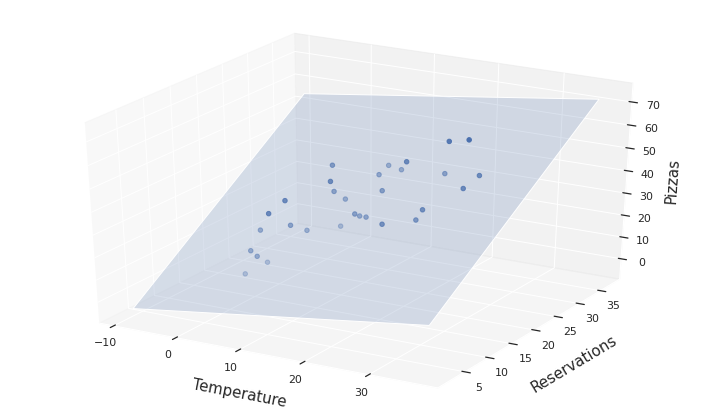

In [92]:
x1 = X[:,0]
x2 = X[:,1]

# These weights came out of the training phase
w = np.array([-3.98230894, 0.37333539, 1.69202346])

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=15)

# Plot the data points
ax.scatter(x1, x2, Y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.tight_layout()
plt.show()


In Roberto’s dataset, $x1$ is the number of reservations and
$x2$ is the temperature. It makes sense that the reservations and the temperature have different impacts on the number of pizzas, so they must have different weights.

In the equation of a line, the bias $b$ shifts the line away from the origin. The same goes for a plane: if we didn’t have $b$, then the plane would be constrained to pass by the origin of the axes.


Now see what happens when Roberto adds yet another column to his dataset:

In [94]:
data3 = np.genfromtxt('data/pizza_3_vars.txt', delimiter =',' ,skip_header =1) 
X, Y = data3[:, 0:3], data3[:, -1]
print(X.shape)
print(Y.shape)

(30, 3)
(30,)


In [95]:
X

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.],
       [23., 25.,  9.],
       [13., 24.,  8.],
       [ 1., 12.,  2.],
       [18., 23.,  9.],
       [10., 18., 10.],
       [26., 24.,  3.],
       [ 3., 14.,  1.],
       [ 3., 12.,  3.],
       [21., 27.,  5.],
       [ 7., 17.,  3.],
       [22., 21.,  1.],
       [ 2., 12.,  4.],
       [27., 26.,  2.],
       [ 6., 15.,  4.],
       [10., 21.,  7.],
       [18., 18.,  3.],
       [15., 26.,  8.],
       [ 9., 20.,  6.],
       [26., 25.,  9.],
       [ 8., 21., 10.],
       [15., 22.,  7.],
       [10., 20.,  2.],
       [21., 21.,  1.],
       [ 5., 12.,  7.],
       [ 6., 14.,  9.],
       [13., 19.,  4.],
       [13., 20.,  3.]])

In [114]:
Y = Y.reshape(-1,1)
Y.shape

(30, 1)

In the book, the author explains with more detail what are matrix multiplications and some other topics. If you are struggling understanding those topics, you can check Chapter 4 of the book, or some resources on the internet. I will skip this part.

Let's start working only with weights (we will talk about the bias after this)
Now let's update some functions

* `predict` function
* `loss` function
* `gradient` function
* `train` function

In [115]:
def predict(X,w): 
  return np.matmul(X, w)

In [116]:
def loss(X, Y, w): 
  return np.mean(predict((X,w)-Y)**2)

You can check this [link](https://nusco.medium.com/of-gradients-and-matrices-1b19de65e5cd) for more details about the new gradient function

In [117]:
def gradient(X, Y, w): 
  return 2 * np.matmul(X.T, predict(X,w)-Y) / X.shape[0] 

In [118]:
def train(X, Y, iterations, lr): 
  w = np.zeros((X.shape[1], 1))
  for i in range(iterations): 
    print(f'iteration {i} => Loss (MSE): {loss(X,Y,w):.10f}')
    w = gradient(X,Y,w) *lr 
  return w

In [119]:
w = train(X, Y, iterations = 10000, lr = 0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


TypeError: ignored

Let's add a precision parameter

In [120]:
w.shape

(3,)

## Dealing with the bias

So far, we implemented this prediction formula:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3$

Now we want to add the bias back to the system, like this:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + b$

We could rush to the code and add the bias everywhere, like we had done before —but hold on a minute. I can teach you a trick to roll the
bias into the code more smoothly.

Give another look at the previous formula. What’s the difference between the
bias and the weights? The only difference is this: 
* The weights are multiplied by some input variable $x$, and the bias is not.

Now imagine that there is one more input variable in the system (let’s call it x0) that always has a value of 1. We can rewrite the formula like this:

* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + x0 * b$

Now there’s no difference at all between bias and weights. The bias is just
the weight of an input variable that happens to have the constant value 1.

So we can add a dummy input variable with the constant value 1, and we won’t need an explicit bias anymore.

Let's do this

In [124]:
X = np.column_stack(np.ones(X.shape[0],X),X))
X.shape 

SyntaxError: ignored

Which value is the bias?

## Summary

* The second part of the notebook was all about multiple linear regression. 

* We extended our program to datasets with more than one input variable—using multiple weights to match the input variables. 

* We also got rid of the explicit bias, turning it into just another weight. 

* Our learning program is now powerful enough to tackle real-world problems, although it doesn’t look any more complicated than it did before.

**Congratulations, you programmed a functional linear regression algorithm!!**